## Pandas
Для некоторых заданий, возможно, придется обратиться к документации: https://pandas.pydata.org/docs/

Скачайте любой табличный датасет (или создайте тестовый пример самостоятельно), например, с https://www.kaggle.com/datasets

Загрузите данные и проанализируйте их (используя функции .info и .describe)

Выведите отдельно интересующую вас колонку и столбец

## Numpy
Для некоторых заданий, возможно, придется обратиться к документации: https://numpy.org

-Создайте вектор (одномерный массив) размера 10, заполненный нулями

-Создайте вектор размера 10, заполненный числом 5.8

-Создйте массив 3x3x3 со случайными значениями

-Создайте 8x8 матрицу и заполнить её в шахматном порядке

-Cоздайте матрицу 4 на 4 и заполните ее произвольными числами (понадобиться в дальйнешем)

## Scipy
Возьмите интеграл ∫10−3𝑠𝑖𝑛(𝑥)∗𝑥2𝑑𝑥
Найдите определитель, обратную матрицу и собственные значения к матрице из последнего пункта раздела Numpy
## Matplotlib/Seaborn
Нарисуйте график sin(x), подпишите оси, добавьте сетку
Нарисуйте график sin(x) и cos(x) на одном subplot'е и на разных, задайте цвета, которые вам больше нравятся

In [25]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import random
from scipy import integrate
from scipy import linalg

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [6]:
data['HouseFloor']

0       10.0
1        8.0
2       17.0
3       22.0
4       16.0
        ... 
9995    12.0
9996     0.0
9997     5.0
9998     9.0
9999     9.0
Name: HouseFloor, Length: 10000, dtype: float64

In [7]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
np.full(10, 5.8)

array([5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8])

In [9]:
np.random.randint(0, 10, size = (3, 3, 3))

array([[[6, 0, 3],
        [8, 1, 1],
        [7, 8, 0]],

       [[3, 4, 7],
        [7, 5, 7],
        [9, 0, 9]],

       [[2, 5, 0],
        [8, 3, 4],
        [1, 3, 3]]])

In [10]:
np.array(([1, 0]*4+[0, 1]*4)*4).reshape((8,8))

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

In [15]:
x = np.zeros((8, 8), dtype=int)
x[1::2, ::2] = 1
x[::2, 1::2] = 1
x

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [19]:
Y = np.random.randint(0, 10, size = (4, 4))
Y

array([[4, 9, 9, 4],
       [4, 5, 7, 5],
       [4, 3, 7, 5],
       [6, 0, 7, 4]])

In [16]:
f1 = lambda x: np.sin(x) * (x**2)
integrate.quad(f1, -3, 10)

(63.57192010714263, 2.1778037844715755e-12)

определитель матрицы

In [20]:

linalg.det(Y)

83.99999999999999

обратная матрица


In [21]:
linalg.inv(Y)

array([[-0.16666667,  1.03571429, -1.22619048,  0.4047619 ],
       [ 0.        ,  0.5       , -0.5       ,  0.        ],
       [ 0.33333333, -1.21428571,  1.02380952, -0.0952381 ],
       [-0.33333333,  0.57142857,  0.04761905, -0.19047619]])

собственные значения и собственные векторы


In [22]:
linalg.eig(Y)

(array([20.46839862+0.j        , -0.60762164+2.26401494j,
        -0.60762164-2.26401494j,  0.74684465+0.j        ]),
 array([[-0.61691694+0.j        ,  0.68764561+0.j        ,
          0.68764561-0.j        , -0.71862212+0.j        ],
        [-0.49642093+0.j        , -0.01251838+0.18631636j,
         -0.01251838-0.18631636j, -0.35534666+0.j        ],
        [-0.44791485+0.j        , -0.16881755+0.21720573j,
         -0.16881755-0.21720573j,  0.59624792+0.j        ],
        [-0.41515303+0.j        , -0.38409685-0.5187147j ,
         -0.38409685+0.5187147j ,  0.04241952+0.j        ]]))

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

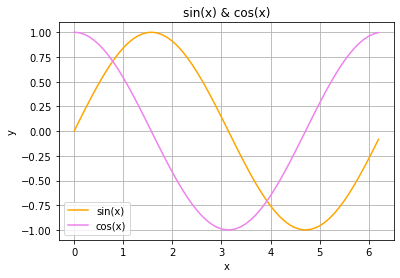

In [31]:
lag = 0.1
x = np.arange(0.0, 2 * np.pi, lag)
y1 = np.sin(x)
y2 = np.cos(x)

fig = plt.figure()
plt.plot(x, y1, color="orange")
plt.plot(x, y2, color="violet")
plt.grid()

plt.title('sin(x) & cos(x)')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(labels=['sin(x)', 'cos(x)'])
plt.show()

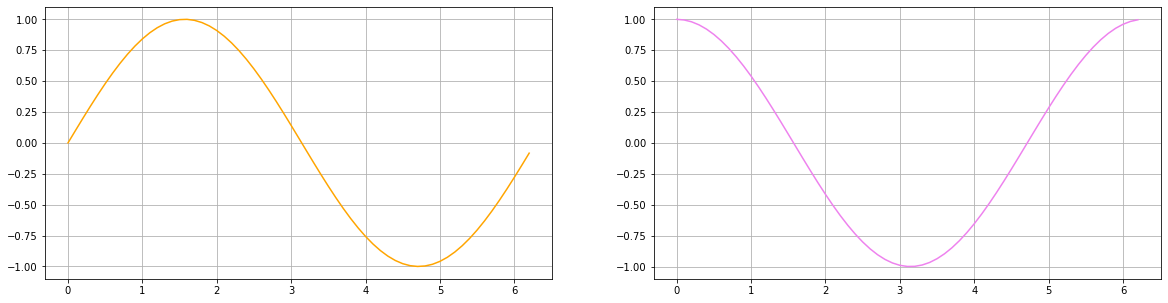

In [34]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y1, '-',  color="orange")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y2, '-',  color="violet")
plt.grid() 